In [23]:
import numpy as np
import pandas as pd
import sys  
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib as mpl
from matplotlib.lines import Line2D
import cmocean
print("Modules imported")


Modules imported


In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))


306
277
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Cache Creek at Yolo
4 == Old River at Coney Island
5 == Clifton Court
6 == Discovery Bay at Indian Slough
7 == Doughty Cut above Grant Line Canal
8 == Sacramento River at Emmaton
9 == Sacramento River at Emmaton
10 == emm upper Emmaton
11 == emm lower Emmaton
12 == Farrar Park
13 == Grant Line Canal at Tracy Rd Bridge
14 == Green's Landing
15 == Harvey O Banks PP
16 == Holland Tract
17 == Harvey O Banks PP
18 == CCWD Old River near Discovery Bay
19 == CCWD Rock Slough PP
20 == Italian Slough Headwater near Byron
21 == Jersey Point
22 == Sacramento River at Mallard Island
23 == Sacramento River at Mallard Island
24 == Middle River at Howard Rd Bridge
25 == San Joaquin at Mossdale Bridge
26 == Middle River at Tracy Blvd
27 == Old River Barrier near DMC (Above)
28 == Old River below Dam
29 == Old River at Bacon Island
30 == Old River at Head
31 == Old River at Byron
32 == Prisoners Point
33 =

In [3]:
#load the filtered station data
dtformat = '%Y-%m-%d %H:%M:%S'
run13=pd.read_csv("/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/staout_6_filt.csv")
run13['datetime']=pd.to_datetime(run13['time'],format=dtformat)
run13.set_index("datetime",inplace=True)
run14=pd.read_csv("/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs/staout_6_filt.csv")
run14['datetime']=pd.to_datetime(run14['time'],format=dtformat)
run14.set_index("datetime",inplace=True)
run14


,time,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-10 00:15:00,2020-09-10 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-10 00:30:00,2020-09-10 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-10 00:45:00,2020-09-10 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-10 01:00:00,2020-09-10 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-10 01:15:00,2020-09-10 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28 23:00:00,2020-11-28 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28 23:15:00,2020-11-28 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28 23:30:00,2020-11-28 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#load the unfiltered data
columns = ['time']
stations_no = [str(i) for i in range(306)]
columns = columns + stations_no

run13_r=pd.read_csv("/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/staout_6", sep='\\s+', names=columns,dtype=np.float32)
timedelta = [pd.Timedelta(i, unit = 's') for i in run13_r.time]
timestamp = [pd.to_datetime("09-10-2020 00:00:00") + i for i in timedelta]  
run13_r['time'] = timestamp
run13_r.set_index("time",inplace=True)
run14_r=pd.read_csv("/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs/staout_6", sep='\\s+', names=columns,dtype=np.float32)
run14_r['time'] = timestamp
run14_r.set_index("time",inplace=True)


In [15]:
# timestamp

In [17]:
run13_r

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
time,,,,,,,,,,,,,,,,,,,,,
2020-09-10 00:15:00,2.96660,0.090541,0.098560,-9999.0,0.341228,0.347191,0.347980,0.350618,0.589549,0.590060,...,0.354496,-999.0,-999.0,0.334520,0.334607,-9999.0,-9999.0,0.314086,0.262076,0.264845
2020-09-10 00:30:00,2.90791,0.090539,0.098610,-9999.0,0.341068,0.344376,0.347993,0.351100,0.571593,0.572725,...,0.354527,-999.0,-999.0,0.333889,0.333796,-9999.0,-9999.0,0.313920,0.261554,0.264206
2020-09-10 00:45:00,2.82165,0.090544,0.098710,-9999.0,0.340798,0.340206,0.347959,0.351347,0.543859,0.545245,...,0.354558,-999.0,-999.0,0.333717,0.334931,-9999.0,-9999.0,0.313527,0.261041,0.263579
2020-09-10 01:00:00,2.71405,0.090547,0.098795,-9999.0,0.340420,0.334965,0.347871,0.351991,0.507818,0.509414,...,0.354593,-999.0,-999.0,0.333510,0.336009,-9999.0,-9999.0,0.313391,0.261193,0.263651
2020-09-10 01:15:00,2.59732,0.090549,0.098803,-9999.0,0.340029,0.330587,0.347948,0.352025,0.470707,0.472459,...,0.354638,-999.0,-999.0,0.333312,0.336759,-9999.0,-9999.0,0.313535,0.262143,0.264581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28 23:00:00,1.72704,0.062958,0.100081,-9999.0,0.277962,0.387700,0.479020,0.332736,0.661164,0.996798,...,0.338581,-999.0,-999.0,0.338950,0.334950,-9999.0,-9999.0,0.441563,0.515226,0.508798
2020-11-28 23:15:00,1.71902,0.062958,0.100069,-9999.0,0.277964,0.387827,0.477989,0.332989,0.593489,0.868267,...,0.338335,-999.0,-999.0,0.339392,0.335629,-9999.0,-9999.0,0.452488,0.511635,0.503954
2020-11-28 23:30:00,1.71283,0.062957,0.100061,-9999.0,0.277966,0.387958,0.477018,0.333323,0.497015,0.777796,...,0.338381,-999.0,-999.0,0.339819,0.336323,-9999.0,-9999.0,0.458974,0.506744,0.499055


In [ ]:
stations[10]

In [ ]:
run13.index

In [ ]:
#plot the 3 stations

station_indices=[21,202,159] #Jersey Point, Franks Tract Mid Tract, Holland Cut near Bethel Island
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    if idx == 21:
        s=2
    if idx == 202:
        s=3
    if idx == 159:
        s=4
    values1 = run13[str(idx)]
    values2 = run14[str(idx)]
       
    ax.plot(values1, label = 'Historical '+stations[idx], linewidth=3, alpha =0.7, color=cmocean.cm.ice((s+1)/6))
    ax.plot(values2, label = 'Event Removed ' +stations[idx], linewidth=3, alpha =0.7,linestyle='--', color=cmocean.cm.ice((s+1)/6))
    
#ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

#leg = ax.legend()
print(ax)
#ax.set_xlim(data1.time.iloc[52000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()


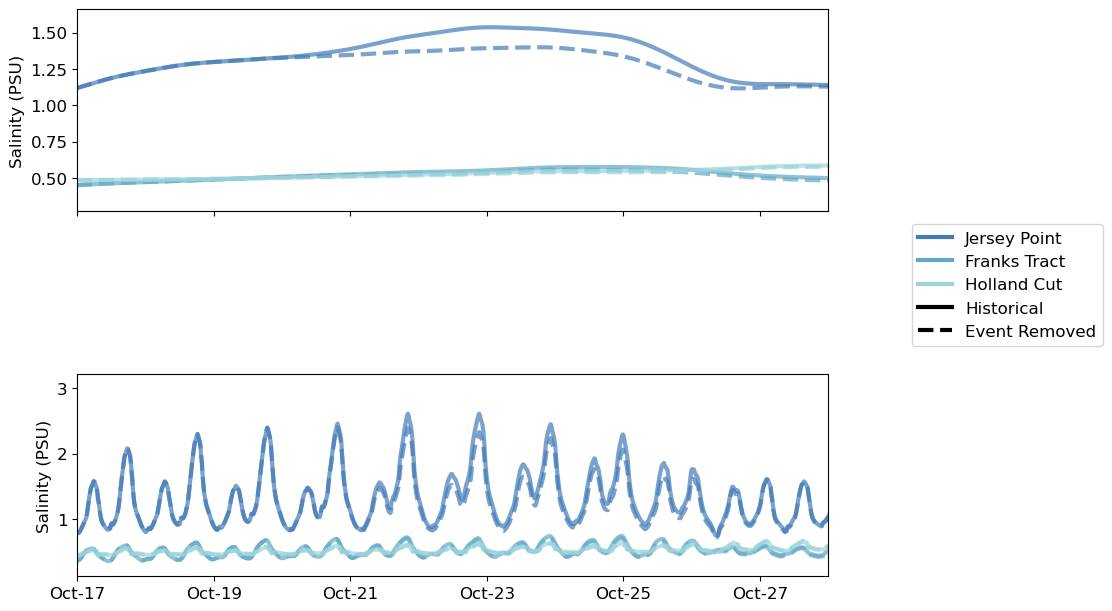

In [29]:
#plot the 3 stations

station_indices=[21,202,159] #Jersey Point, Franks Tract Mid Tract, Holland Cut near Bethel Island
fig, ax = plt.subplots(2,1,layout='constrained',sharex=True,figsize=[11,6])
mpl.rcParams.update({'font.size': 12})

# ax.grid(alpha=0.5)
for idx in station_indices:
    if idx == 21:
        s=2
    if idx == 202:
        s=3
    if idx == 159:
        s=4
    values1 = run13[str(idx)]
    values2 = run14[str(idx)]
    values3 = run13_r[str(idx)]
    values4 = run14_r[str(idx)]
       
    ax[0].plot(values1, label = 'Historical '+stations[idx], linewidth=3, alpha =0.7, color=cmocean.cm.ice((s+1)/6))
    ax[0].plot(values2, label = 'Event Removed ' +stations[idx], linewidth=3, alpha =0.7,linestyle='--', color=cmocean.cm.ice((s+1)/6))

# plot the unfiltered below
    ax[1].plot(values3, label = 'Historical '+stations[idx], linewidth=3, alpha =0.7, color=cmocean.cm.ice((s+1)/6))
    ax[1].plot(values4, label = 'Event Removed ' +stations[idx], linewidth=3, alpha =0.7,linestyle='--', color=cmocean.cm.ice((s+1)/6))

color_dict= {'Jersey Point': cmocean.cm.ice(3/6),
             'Franks Tract': cmocean.cm.ice(4/6),
             'Holland Cut': cmocean.cm.ice(5/6)}
style_dict={'Historical':'-',
            'Event Removed':'--'}
overall_dict= color_dict | style_dict
# color_dict= {'Point Reyes Tide Gauge': 'maroon',
#              'Monterey Tide Gauge': 'brown',
#              'Jersey Point EC': 'green',
#              'Holland Cut EC': 'skyblue',
#              'Franks Tract EC':'yellow'}
#stations_latlon=stations.to_crs(epsg=4326)


custom_points1=[Line2D([0], [0],linestyle='-',linewidth=3, color=c) for c in color_dict.values()]
custom_points2=[Line2D([0], [0],linestyle=s,linewidth=3, color='k') for s in style_dict.values()]
custom_points=custom_points1+custom_points2 # concatenate the lists

#leg = plt.legend(handles=[a,b,c,d,e,f,g],loc='upper right', bbox_to_anchor=(1.8, 2.0))
leg = plt.legend(custom_points, overall_dict.keys(),bbox_to_anchor=(1.1, 1.1))

ax[1].set_xlim(pd.to_datetime("2020-10-17"),pd.to_datetime("2020-10-28")) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax[0].set_ylabel('Salinity (PSU)')
ax[1].set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()


In [31]:
#What is the time of the max salinity during the event?
eventrange=run13_r['21'].loc[pd.to_datetime("2020-10-17"):pd.to_datetime("2020-10-28")]
eventrange.idxmax()

Timestamp('2020-10-22 21:15:00')